---
title : "Fragility Curve Overtopping"
execute:
    output: asis
---

Voor het berekenen van een fragility curve voor het mechanisme GEKB wordt gebruikt gemaakt van de [`pydra_core`](https://github.com/HKV-products-services/pydra_core) module, meer documentatie over de `pydra_core` module is [hier](https://hkv-products-services.github.io/pydra_core/) te vinden. 

De module wordt gebruikt om een overslag debiet te berekenen voor verschillende omstandigheden en op basis hiervan wordt een fragility curve opgesteld.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from toolbox_continu_inzicht.fragility_curves import (
    FragilityCurveOvertoppingWaveData,
)


In [2]:
from toolbox_continu_inzicht.base.data_adapter import Config, DataAdapter

path = Path.cwd() / "data_sets" / "8.fragility_curve_overtopping_wavedata"
config = Config(config_path=path / "test_fragility_curve_overtopping_wavedata.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)


De volgende configuratie wordt gebruikt voor het maken van een GEKB curve

```yaml
GlobalVariables:
    rootdir: "data_sets/8.fragility_curve_overtopping_wavedata"
    moments: [ -24, 0, 24, 48 ]

DataAdapter:
    default_options:
        csv:
            sep: ","
    slopes:
        type: csv
        file: "slopes_5.csv"
    profiles:
        type: csv
        file: "profiles_new.csv"
    waveval_uncert:
        type: csv
        file: "waveval_uncert_5.csv"
        index_col: false
    waveval_id:
        type: csv
        file: "waveval_id_5.csv"
        index_col: false
    waveval:
        type: csv
        file: "waveval_5.csv"
        index_col: false
    fragility_curves:
        type: csv
        file: "fragility_curves_5.csv"


```

Er zijn vijf verschillende data bestanden nodig.<br>
Ten eerste een tabel met de informatie over de helling (slope) waarvoor de curve wordt afgeleid.


In [3]:
data_adapter.input("slopes")


,profileid,slopetypeid,x,y,r,damheight
0,5,1,-12.59,10.76,1,0
1,5,1,0.00,14.63,1,0
2,5,2,-68.82,10.00,1,0
3,5,2,-12.59,10.76,1,0


Ten tweede informatie over de hoogte van de kruin, de orientatie, of er een dam is, maatgevende windsnelheid enz.


In [4]:
data_adapter.input("profiles")


,parameters,values
0,sectionid,11
1,crestlevel,14.63
2,orientation,167
3,dam,0
4,damheight,0
5,qcr,closed
6,windspeed,20
7,sectormin,180.0
8,sectorsize,90.0
9,closing_situation,0


Ten derde de onzekerheden van de golfparameters per HR-locatie (modelonzekerheden).


In [5]:
data_adapter.input("waveval_uncert")


,hr_locid,closing_situation,waveval_type,mean,stddev
0,13421200,1,2,0.94,0.15
1,13421200,1,6,0.89,0.04
2,13421200,2,2,0.94,0.15
3,13421200,2,6,0.89,0.04


Ten vierde de index voor de golfcombinaties (per windrichting en windsnelheid) met het type golfparameter.


In [6]:
data_adapter.input("waveval_id")


,waveval_id,waveval_type,hr_locid,hr_location,winddir,windspeed
0,1,2,13421200,034-02_0200_9_HD_km0996,225.0,0.0
1,2,2,13421200,034-02_0200_9_HD_km0996,225.0,10.0
2,3,2,13421200,034-02_0200_9_HD_km0996,225.0,20.0
3,4,2,13421200,034-02_0200_9_HD_km0996,225.0,30.0
4,5,2,13421200,034-02_0200_9_HD_km0996,225.0,42.0
...,...,...,...,...,...,...
256,257,7,13421200,034-02_0200_9_HD_km0996,202.5,0.0
257,258,7,13421200,034-02_0200_9_HD_km0996,202.5,10.0
258,259,7,13421200,034-02_0200_9_HD_km0996,202.5,20.0
259,260,7,13421200,034-02_0200_9_HD_km0996,202.5,30.0


Ten vijfde de daadwerkelijke golfwaarden per waterstand, gekoppeld aan de golfcombinaties via `waveval_id`.


In [7]:
data_adapter.input("waveval").head(4)  # (ingekorte versie)


,waveval_id,waterlevel,waveval
0,1,0.524700,0.0
1,1,0.723951,0.0
2,1,0.923203,0.0
3,1,1.122454,0.0


Deze informatie wordt mee gegeven aan de FragilityCurveOvertoppingWaveData voor het genereren van een curve.


In [8]:
fragility_curve_overtopping = FragilityCurveOvertoppingWaveData(
    data_adapter=data_adapter
)
fragility_curve_overtopping.run(
    input=[
        "slopes",
        "profiles",
        "waveval_uncert",
        "waveval_id",
        "waveval",
    ],
    output="fragility_curves",
)


Deze curve kunnen we vervolgens weergeven:


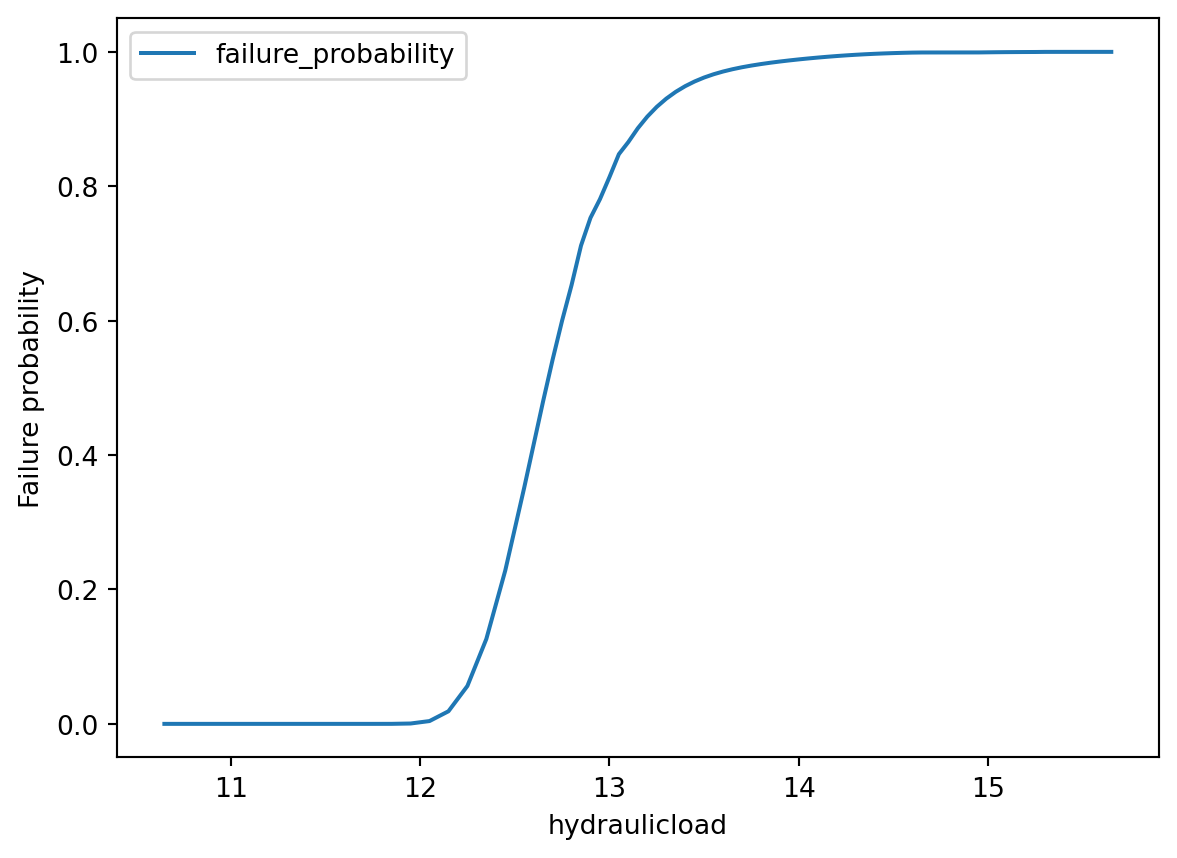

In [9]:
fig, ax = plt.subplots()
fragility_curve_overtopping.as_dataframe().set_index("hydraulicload").plot(ax=ax)
ax.set_ylabel("Failure probability");


In [10]:
data_adapter.input("fragility_curves")


,Unnamed: 0,hydraulicload,failure_probability
0,0,10.65,0.000000e+00
1,1,10.75,0.000000e+00
2,2,10.85,0.000000e+00
3,3,10.95,1.208023e-247
4,4,11.05,2.993059e-117
...,...,...,...
76,76,15.45,9.999820e-01
77,77,15.50,9.999859e-01
78,78,15.55,9.999889e-01
79,79,15.60,9.999913e-01
